In [ ]:
import pysam
import os, sys
import pandas as pd
import scipy


def pysam_idxstats(file):
    #print(file)
    try:
        bam = pysam.AlignmentFile(file, "rb")
        stats = bam.get_index_statistics()
        # stats = []
        reads = sum([e[1] for e in stats])
    except ValueError:
        reads = 0
    return reads
        
# file = "/g/korbel2/weber/workspace/ashleys-qc-pipeline/.tests/data_CHR17/RPE-BM510/bam/BM510x04_PE20308.sort.mdup.bam"
directory = "/scratch/tweber/DATA/MC_DATA/EVA_1511_H372MAFX5/2022-11-02-H372MAFX5/RPE1BCL11A/bam"
#list_dir = sorted([e for e in os.listdir(directory) if e.endswith(".sort.mdup.bam")])
list_dir = labels.loc[labels["prediction"] == 1, "cell"].values.tolist()

reads_nb = [pysam_idxstats(file=directory + "/" + e) for e in list_dir]
print(reads_nb)

# df = pd.read_csv(snakemake.input.labels, sep="\t")
# df[""]


: 

In [2]:
import os, sys
import pandas as pd
import scipy
import seaborn as sns
import matplotlib.pyplot as plt


# directory = "/scratch/tweber/DATA/MC_DATA/EVA_1511_H33JMAFX5/"
directories = ["/scratch/tweber/DATA/MC_DATA/PAPER/", "/scratch/tweber/DATA/MC_DATA/EVA_1511_H33JMAFX5/", "/scratch/tweber/DATA/MC_DATA/EVA_1511_H372MAFX5/"]

labels_selected = list()

for directory in directories:
    for sample in os.listdir(directory):
        if sample not in ["config", "log"]:
            try:
                print(directory, sample)

                # sample = directory.split("/")[-1]
                counts = directory + "{sample}/counts/{sample}.txt.raw.gz".format(sample=sample)
                counts_df = pd.read_csv(counts, sep="\t", compression="gzip")
                counts_gb_df = counts_df.groupby("cell")[["c","w"]].sum()
                counts_gb_df["nb_reads"] = counts_gb_df["c"] + counts_gb_df["w"]


                labels = pd.read_csv(directory + "{sample}/cell_selection/labels_raw.tsv".format(sample=sample), sep="\t").sort_values(by="cell")
                labels["sample"] = sample
                labels["cell"] = labels["cell"].str.replace(".sort.mdup.bam", "")
                tmp_df = labels.loc[labels["prediction"] == 1]
                # tmp_df["nb_reads"] = reads_nb
                tmp_df = pd.merge(counts_gb_df.reset_index()[["cell", "nb_reads"]], tmp_df, on="cell")
                tmp_df["z_score"] = scipy.stats.zscore(tmp_df["nb_reads"])
                # tmp_df = tmp_df.melt(id_vars=["sample", "cell"], value_vars=["nb_reads", "z_score"])
                tmp_df.loc[tmp_df["z_score"] > 5, "new_prediction"] = 0

                tmp_df["new_prediction"] = tmp_df["new_prediction"].fillna(1)
                tmp_df["new_prediction"] = tmp_df["new_prediction"].astype(int)
                labels_selected.append(tmp_df)
            except FileNotFoundError:
                pass

labels_selected = pd.concat(labels_selected)
pd.options.display.max_rows = 400
labels_selected


/scratch/tweber/DATA/MC_DATA/PAPER/ RPE1-WT


/tmp/ipykernel_3960865/1427240171.py:28: FutureWarning: The default value of regex will change from True to False in a future version.
  labels["cell"] = labels["cell"].str.replace(".sort.mdup.bam", "")


/scratch/tweber/DATA/MC_DATA/PAPER/ RPE-BM510


/tmp/ipykernel_3960865/1427240171.py:28: FutureWarning: The default value of regex will change from True to False in a future version.
  labels["cell"] = labels["cell"].str.replace(".sort.mdup.bam", "")


/scratch/tweber/DATA/MC_DATA/PAPER/ LCL


/tmp/ipykernel_3960865/1427240171.py:28: FutureWarning: The default value of regex will change from True to False in a future version.
  labels["cell"] = labels["cell"].str.replace(".sort.mdup.bam", "")


/scratch/tweber/DATA/MC_DATA/PAPER/ C7


/tmp/ipykernel_3960865/1427240171.py:28: FutureWarning: The default value of regex will change from True to False in a future version.
  labels["cell"] = labels["cell"].str.replace(".sort.mdup.bam", "")


/scratch/tweber/DATA/MC_DATA/EVA_1511_H33JMAFX5/ HGSVCpool1xulOPxmanual


/tmp/ipykernel_3960865/1427240171.py:28: FutureWarning: The default value of regex will change from True to False in a future version.
  labels["cell"] = labels["cell"].str.replace(".sort.mdup.bam", "")


/scratch/tweber/DATA/MC_DATA/EVA_1511_H33JMAFX5/ KM1096


/tmp/ipykernel_3960865/1427240171.py:28: FutureWarning: The default value of regex will change from True to False in a future version.
  labels["cell"] = labels["cell"].str.replace(".sort.mdup.bam", "")


/scratch/tweber/DATA/MC_DATA/EVA_1511_H33JMAFX5/ HGSVCpool1xulOPxEcho


/tmp/ipykernel_3960865/1427240171.py:28: FutureWarning: The default value of regex will change from True to False in a future version.
  labels["cell"] = labels["cell"].str.replace(".sort.mdup.bam", "")


/scratch/tweber/DATA/MC_DATA/EVA_1511_H372MAFX5/ MRD48h
/scratch/tweber/DATA/MC_DATA/EVA_1511_H372MAFX5/ RPE1BCL11A


/tmp/ipykernel_3960865/1427240171.py:28: FutureWarning: The default value of regex will change from True to False in a future version.
  labels["cell"] = labels["cell"].str.replace(".sort.mdup.bam", "")


/scratch/tweber/DATA/MC_DATA/EVA_1511_H372MAFX5/ PC7PC37PC39PC42


/tmp/ipykernel_3960865/1427240171.py:28: FutureWarning: The default value of regex will change from True to False in a future version.
  labels["cell"] = labels["cell"].str.replace(".sort.mdup.bam", "")


,cell,nb_reads,prediction,probability,sample,z_score,new_prediction
0,RPE1WTPE20401,309789,1,0.9726,RPE1-WT,-0.593283,1
1,RPE1WTPE20402,502039,1,0.9155,RPE1-WT,0.564392,1
2,RPE1WTPE20403,428373,1,0.9576,RPE1-WT,0.120796,1
3,RPE1WTPE20404,697464,1,0.9475,RPE1-WT,1.741185,1
4,RPE1WTPE20405,480834,1,0.9579,RPE1-WT,0.436701,1
...,...,...,...,...,...,...,...
1,PC7PC37PC39PC42x01PE20343,153674,1,0.6315,PC7PC37PC39PC42,-0.451030,1
2,PC7PC37PC39PC42x01PE20348,97632,1,0.6274,PC7PC37PC39PC42,-0.835110,1
3,PC7PC37PC39PC42x01PE20374,153570,1,0.7452,PC7PC37PC39PC42,-0.451743,1
4,PC7PC37PC39PC42x01PE20393,535760,1,0.7922,PC7PC37PC39PC42,2.167571,1


In [ ]:
pd.options.display.max_rows = 400
labels_selected

: 

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'RPE1-WT'),
  Text(1, 0, 'RPE-BM510'),
  Text(2, 0, 'LCL'),
  Text(3, 0, 'C7'),
  Text(4, 0, 'HGSVCpool1xulOPxmanual'),
  Text(5, 0, 'KM1096'),
  Text(6, 0, 'HGSVCpool1xulOPxEcho'),
  Text(7, 0, 'RPE1BCL11A'),
  Text(8, 0, 'PC7PC37PC39PC42')])

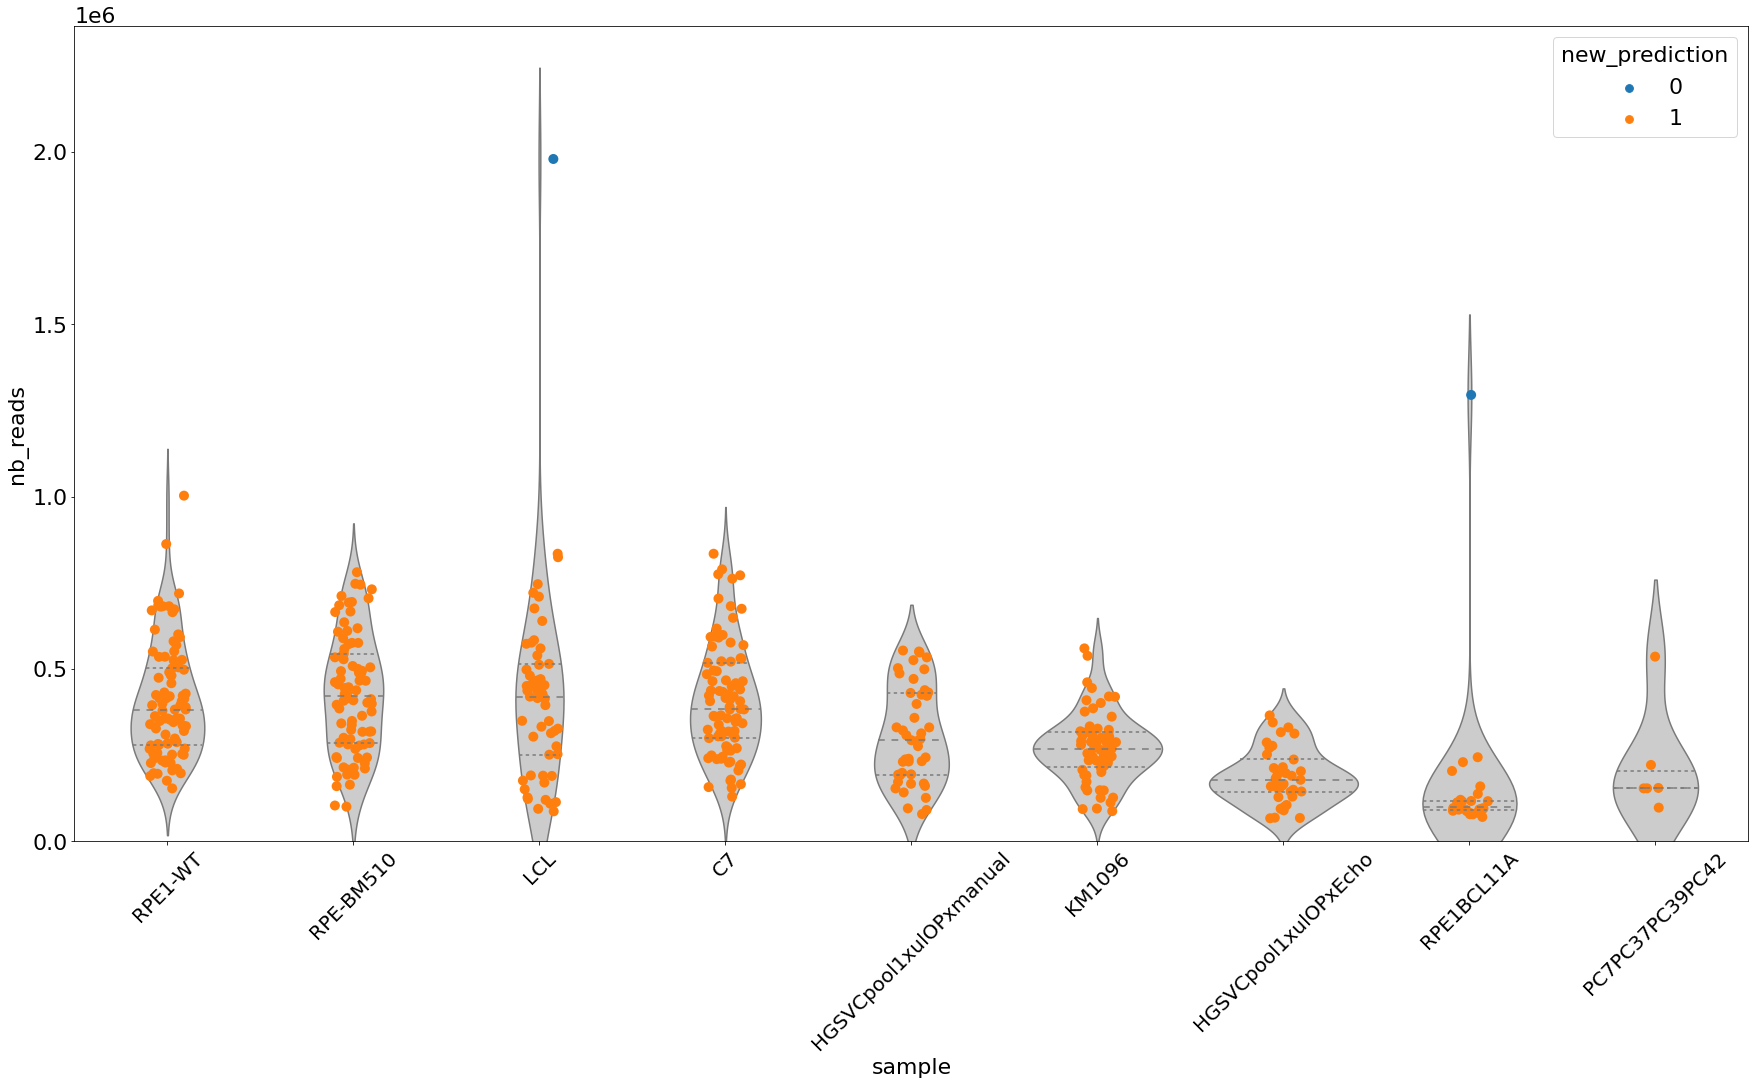

In [9]:
plt.rcParams.update({'font.size': 22})
f, ax = plt.subplots(figsize=(30,15))

sns.violinplot(x="sample", y="nb_reads", data=labels_selected, color="0.8", inner="quartile")
# ax2 = ax.twinx()
sns.stripplot(x="sample", y="nb_reads", hue="new_prediction", data=labels_selected, jitter=True, zorder=1, s=10)
plt.ylim(ymin=0)
plt.xticks(rotation=45, fontsize=20)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'RPE1-WT'),
  Text(1, 0, 'RPE-BM510'),
  Text(2, 0, 'LCL'),
  Text(3, 0, 'C7'),
  Text(4, 0, 'HGSVCpool1xulOPxmanual'),
  Text(5, 0, 'KM1096'),
  Text(6, 0, 'HGSVCpool1xulOPxEcho'),
  Text(7, 0, 'RPE1BCL11A'),
  Text(8, 0, 'PC7PC37PC39PC42')])

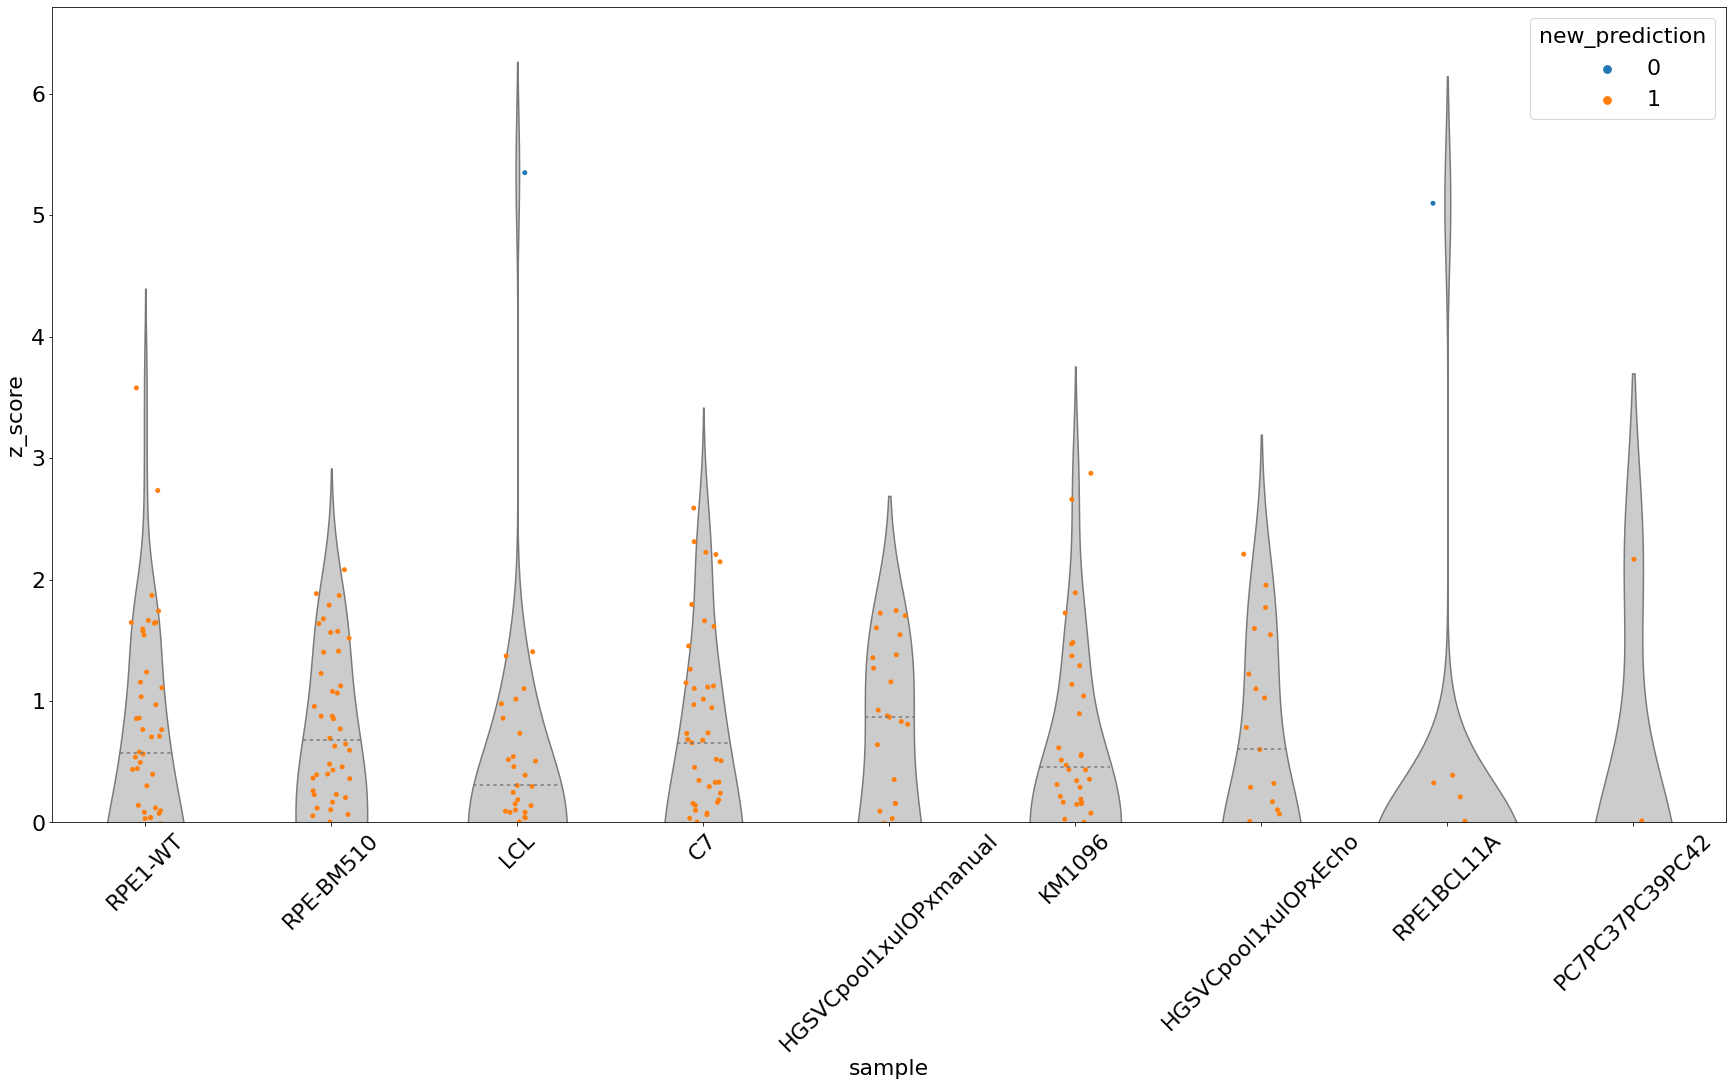

In [5]:
plt.rcParams.update({'font.size': 22})
f, ax = plt.subplots(figsize=(30,15))

sns.violinplot(x="sample", y="z_score", data=labels_selected, color="0.8", inner="quartile")
# ax2 = ax.twinx()
sns.stripplot(x="sample", y="z_score", hue="new_prediction", data=labels_selected, jitter=True, zorder=1)
plt.ylim(ymin=0)
plt.xticks(rotation=45)


In [ ]:
import os, sys
import pandas as pd
import scipy

directory = "/scratch/tweber/DATA/MC_DATA/EVA_1511_H372MAFX5/2022-11-02-H372MAFX5/RPE1BCL11A"

sample = directory.split("/")[-1]
print(sample)
counts = directory + "/counts/{sample}.txt.raw.gz".format(sample=sample)

# LOAD MOSAIC COUNTS
# counts = snakemake.input.counts
counts_df = pd.read_csv(counts, sep="\t", compression="gzip")
counts_df["cell"] = counts_df["cell"] + ".sort.mdup.bam"
# Groupby cell & sum reads
counts_gb_df = counts_df.groupby("cell")[["c","w"]].sum()
counts_gb_df["nb_reads"] = counts_gb_df["c"] + counts_gb_df["w"]

# Load ashleys predictions
# labels_path = snakemake.input.labels
labels = pd.read_csv(directory + "/cell_selection/labels_raw.tsv".format(sample=sample), sep="\t").sort_values(by="cell")
# labels = pd.read_csv(labels_path, sep="\t").sort_values(by="cell")
labels["sample"] = sample

# Retrieve correct prediction
labels_corrected = labels.loc[labels["prediction"] == 1]
# labels_corrected["nb_reads"] = reads_nb

# Merge counts & labels
labels_corrected = pd.merge(counts_gb_df.reset_index()[["cell", "nb_reads"]], labels_corrected, on="cell")
# Compute z-score on reads nb
labels_corrected["z_score"] = scipy.stats.zscore(labels_corrected["nb_reads"])
# labels_corrected = labels_corrected.melt(id_vars=["sample", "cell"], value_vars=["nb_reads", "z_score"])

# Correct outliers predictions & proba
labels_corrected.loc[labels_corrected["z_score"] >= 5, "new_prediction"] = 0
labels_corrected.loc[labels_corrected["z_score"] >= 5, "new_probability"] = 0
labels_corrected.loc[labels_corrected["z_score"] < 5, "new_probability"] = labels_corrected.loc[labels_corrected["z_score"] < 5, "probability"]
labels_corrected["new_prediction"] = labels_corrected["new_prediction"].fillna(1)
labels_corrected["new_prediction"] = labels_corrected["new_prediction"].astype(int)

# Back to full dataframe
labels.loc[labels["cell"].isin(labels_corrected.cell.values.tolist()), "prediction"] = labels_corrected.new_prediction.values.tolist()
labels.loc[labels["cell"].isin(labels_corrected.cell.values.tolist()), "probability"] = labels_corrected.new_probability.values.tolist()
labels

: 

In [ ]:
labels.loc[labels["cell"].isin(labels_corrected.cell.values.tolist()), "prediction"] = labels_corrected.new_prediction.values.tolist()
labels.loc[labels["cell"].isin(labels_corrected.cell.values.tolist()), "probability"] = labels_corrected.new_probability.values.tolist()
labels

: 

: 